In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functools as ft
import statsmodels.api as sm
import scipi as sc
import statsmodels.stats.api as sms;
import statsmodels.discrete.discrete_model as smdiscrete

In [17]:
portf=pd.read_excel('Industry_Portfolios.xlsx')
# portf.set_index(['Date'])

In [19]:
# Estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolio 
# using the market model: regress the monthly excess returns for each industry portfolio 
# on the monthly excess returns for the market portfolio.

# 1. 'industry_portfolio' with monthly excess returns for each industry portfolio
# 2. 'market_portfolio' with monthly excess returns for the market portfolio
# for market portfolio beta is equal to 1 so only need alpha 

# Create a list to store the results for each industry
results = []

# Loop through each industry portfolio and perform linear regression
for industry in portf.columns[1:-1]:  # Exclude the 'Market' column
    Y = portf[industry]  # Excess returns for the industry portfolio
    X = portf['Market']  # Excess returns for the market portfolio
    X = sm.add_constant(X)  # Add a constant term for the intercept (α)

    # Fit the linear regression model
    model = sm.OLS(Y, X).fit()

    # Extract the intercept (α) and slope coefficient (β)
    alpha = model.params['const']
    beta = model.params['Market']

    # Append the results to the list
    results.append({'Industry': industry, 'α': alpha, 'β': beta})

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Print the results
results_df

,Industry,α,β
0,NoDur,0.414599,0.652647
1,Durbl,-0.499909,1.648536
2,Manuf,0.137691,1.169846
3,Enrgy,0.505638,0.969850
4,HiTec,-0.081306,1.132969
5,Telcm,0.207596,0.900729
6,Shops,0.298048,0.826492
7,Hlth,0.280347,0.673036
8,Utils,0.504633,0.538086
9,Other,-0.414085,1.207309


In CAPM model the alpha coefficient represents the pricing error (ideally it should be 0). Positive alpha means that assets have overperformed compared to the model prediction, which is the case of portfolios 0, 2, 3, 5, 6, 7, 8. Negative alpha, on the other hand, means that CAPM forecasted a better performance (portfolios 1, 4, 9)
Beta coefficient determines the slope and represents the exposure towards systematic risk. For the market, the beta is 1. Beta more that 1 means high volatility and more riskiness (portfolios 1, 2, 4, 9), while beta less than 1 (so less than systematic risk for the marker as a whole) means less volatility, less 'sensitivity' for market changes (portfolios 0, 3, 5, 6, 7, 8)

Portfolio Manuf had the least pricing error (alpha=0.14), while portfolios NoDur and Utils seem to be more balanced - they have a low pricing error and at the same time are least exposed to market risk (a=0.41, b=0.65 and a=0.5, b=0.53 respectively) 

In [33]:
# create sml

portf_m=pd.read_excel('Industry_Portfolios.xlsx')
portf_m.drop(columns=['Date'])
mean_returns = portf_m.agg(["mean"])
mean_returns.T

,mean
Date,200856.500000
NoDur,0.902833
Durbl,0.733333
Manuf,1.012833
Enrgy,1.231167
HiTec,0.766250
Telcm,0.881417
Shops,0.916333
Hlth,0.783833
Utils,0.907167


In [36]:
# Create arrays for mean monthly returns and beta
mean_returns = np.array([0.902833,0.733333,1.012833,1.231167,0.76625,0.881417,0.916333,0.783833,0.907167,0.489083,0.748083])
betas = np.array([0.652647,1.648536,1.169846,0.96985,1.132969,0.900729,0.826492,0.673036,0.538086,1.207309,1])

# Add a constant term for the intercept
betas_with_intercept = sm.add_constant(betas)

# Fit the linear regression model
model = sm.OLS(mean_returns, betas_with_intercept).fit()

# Get the regression coefficients
intercept, slope = model.params

# Print the intercept and slope coefficients
print("Y-intercept(Rfr):", intercept)
print("Slope coefficient (Treynor):", slope)

Y-intercept(Rfr): 1.0327684005099753
Slope coefficient (Treynor): -0.1854676436036875


In [37]:
def calculate_expected_return(beta, risk_free_rate, market_return):
    expected_return = risk_free_rate + asset_beta * (-0.1854676436036876) # add rfr to asset risk times treynor to get exp r
    return expected_return

risk_free_rate = 1.0327684005099753  # risk-free rate
market_return = 0.748083  # actual market return
asset_beta = 2  # beta of the asset or portfolio we need to plot the sml


expected_return = calculate_expected_return(asset_beta, risk_free_rate, market_return)
print("SML Expected Return for beta = 2:", expected_return)

SML Expected Return for beta = 2: 0.6618331133026001


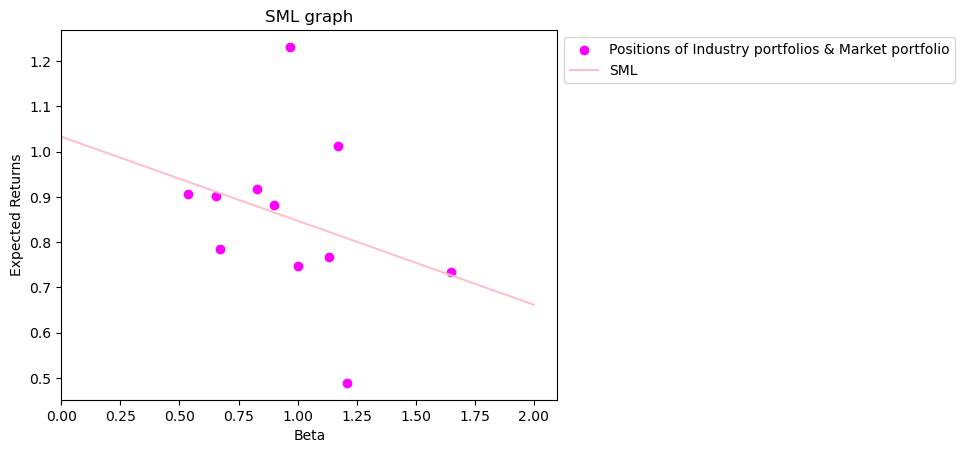

In [40]:
x = np.array([0.652647,1.648536,1.169846,0.96985,1.132969,0.900729,0.826492,0.673036,0.538086,1.207309,1])  # betas
y_scatter = np.array([0.902833,0.733333,1.012833,1.231167,0.76625,0.881417,0.916333,0.783833,0.907167,0.489083,0.748083])
# mean returns
xx = np.array([0,1,2]) #sample x we need to plot

# Example data for the straight line (example: y = 1.5x + 2)
y_line = -0.1854676436036876 * xx + 1.0327684005099753

# Create a scatter plot for the points
plt.scatter(x, y_scatter, label='Positions of Industry portfolios & Market portfolio', color='magenta', marker='o')

# Create the straight line plot
plt.plot(xx, y_line, label='SML', color='pink')

# Add labels, legend, and title
plt.xlabel('Beta')
plt.ylabel('Expected Returns')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('SML graph')

# Show the plot
plt.grid(False)
plt.xlim(0)
plt.show()

The security market line, SML is a line that is a graphical representation of CAPM. It can help to determine whether an assets offers a good return on the risk level it has. Normally, it has a positive slope coefficient (which is not our case...) in this case SML slope means that there is a negative correlation between risk and returns - the higher the risk, the less the expected return.

In terms of portfolio position, those who lay above the SML are considered to be underpriced (there is a high demand on them, which causes their expected return drop down back to SML), and vice versa.